
Name    : Rizky Juanda

Address : Kota Langsa

Email   : rjuanda0@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2020-10-21 05:14:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.0MB/s    in 39s     

2020-10-21 05:14:50 (7.82 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images' 

In [4]:
os.listdir(base_dir)

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True,
    rescale = 1./255,
    validation_split = 0.4)

In [6]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (200, 200),
    class_mode = 'categorical',
    subset = 'training',)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (200, 200),
    class_mode = 'categorical',
    subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation = 'softmax')])

In [8]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('val_accuracy') > 0.99):
      print('Reached 99% accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = CustomCallback()

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch = 22, 
      epochs = 20,
      validation_data = validation_generator, 
      validation_steps = 5, 
      verbose = 2,
      callbacks = callbacks
)

Epoch 1/20
22/22 - 65s - loss: 1.1714 - accuracy: 0.3932 - val_loss: 1.0611 - val_accuracy: 0.5250
Epoch 2/20
22/22 - 67s - loss: 0.8978 - accuracy: 0.5866 - val_loss: 0.6998 - val_accuracy: 0.6750
Epoch 3/20
22/22 - 65s - loss: 0.5689 - accuracy: 0.7789 - val_loss: 0.4242 - val_accuracy: 0.8625
Epoch 4/20
22/22 - 67s - loss: 0.4103 - accuracy: 0.8537 - val_loss: 0.2711 - val_accuracy: 0.9000
Epoch 5/20
22/22 - 70s - loss: 0.3048 - accuracy: 0.8778 - val_loss: 0.2890 - val_accuracy: 0.8938
Epoch 6/20
22/22 - 67s - loss: 0.2827 - accuracy: 0.9091 - val_loss: 0.3546 - val_accuracy: 0.8750
Epoch 7/20
22/22 - 67s - loss: 0.2845 - accuracy: 0.8906 - val_loss: 0.3153 - val_accuracy: 0.8750
Epoch 8/20
22/22 - 64s - loss: 0.2374 - accuracy: 0.9125 - val_loss: 0.1328 - val_accuracy: 0.9688
Epoch 9/20
22/22 - 67s - loss: 0.2433 - accuracy: 0.9062 - val_loss: 0.2337 - val_accuracy: 0.9187
Epoch 10/20
22/22 - 64s - loss: 0.2673 - accuracy: 0.9065 - val_loss: 0.2182 - val_accuracy: 0.9000
Epoch 11/

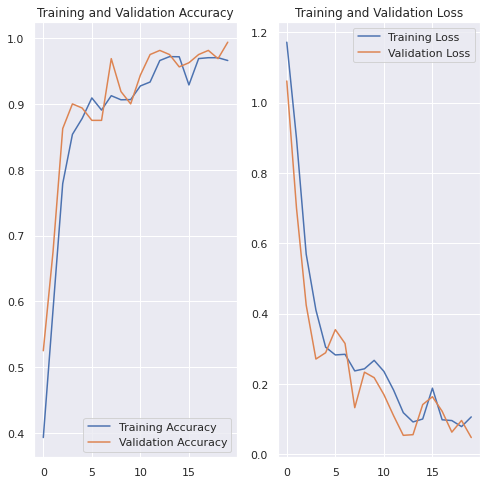

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 1lEpWTJDphkm3HdC.png to 1lEpWTJDphkm3HdC.png
1lEpWTJDphkm3HdC.png
scissors


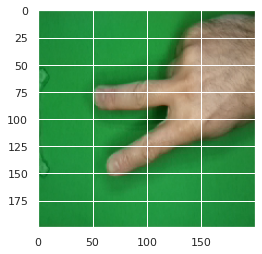

In [13]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (200, 200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] != 0:
    print('paper')
  elif classes[0, 1] != 0:
    print('rock')
  elif classes[0, 2] != 0:
    print('scissors')
  else:
    print('unknown')